In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

In [6]:
d = pd.DataFrame()
x = ['india']*100
d.insert(0, 'x', x)
y = pd.DataFrame()
y = y.append(d)
display(y)

,x
0,india
1,india
2,india
3,india
4,india
...,...
95,india
96,india
97,india
98,india


In [9]:
from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 100

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

count = 0
while count <= max_count:
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)
    count += 1

IntProgress(value=0)

In [11]:
import os
os.system

In [37]:
from sklearn.metrics import roc_auc_score , roc_curve , roc_auc_score , det_curve , confusion_matrix
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [27]:
cl1_pred = [0.9,0.8 , 0.2 ,0.6,0.7,0.1,0.3,0.8,0.9,0.4]
cl1_true = [1,1,0,1,1,0,0,1,1,0]

cl2_pred = [0.7, 0.6, 0.4, 0.4, 0.5, 0.1, 0.3, 0.6,0.3 ,0.1]
cl2_true = [1,1,0,1,1,0,0,1,1,0]

clfa = pd.DataFrame({
    'pred' : cl1_pred ,
    'true' :cl1_true
})
clfb = pd.DataFrame({
    'pred' : cl2_pred ,
    'true' :cl2_true
})
display(clfb , clfa)

,pred,true
0,0.7,1
1,0.6,1
2,0.4,0
3,0.4,1
4,0.5,1
5,0.1,0
6,0.3,0
7,0.6,1
8,0.3,1
9,0.1,0


,pred,true
0,0.9,1
1,0.8,1
2,0.2,0
3,0.6,1
4,0.7,1
5,0.1,0
6,0.3,0
7,0.8,1
8,0.9,1
9,0.4,0


sensitivity, recall, hit rate, or true positive rate (TPR) 


${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }{\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$ 

specificity, selectivity or true negative rate (TNR)

${\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }{\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }$

In [52]:
def conf_matrix(pred , true , thres):
    pout = []
    for p in pred:
        if(p >= thres):
            pout .append(1)
        else:
            pout .append(0)
    #return true
    cf = confusion_matrix(true , pout )
    tp , fn = cf[0,0] , cf[0,1]
    tn , fp = cf[1,1] , cf[1,0]
    sens = tp / (tp+fn) 
    spc = tn / (tn+fp)
    return cf , tp , fn , sens , spc   


1.0 1.0


In [61]:
th = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 ,0.7 , 0.8 , 0.9]
for t in th:
    #print(t)
    _ , _ ,_ , sn , sf = conf_matrix(clfb['pred'] , clfb['true'] , t)
    print(sn , sf , t )

0.0 1.0 0.1
0.5 1.0 0.2
0.5 1.0 0.3
0.75 0.8333333333333334 0.4
1.0 0.6666666666666666 0.5
1.0 0.5 0.6
1.0 0.16666666666666666 0.7
1.0 0.0 0.8
1.0 0.0 0.9


In [30]:
r1 = roc_auc_score(clfa['true'] , clfa['pred']) 
r2 = roc_auc_score(clfb['true'] , clfb['pred'])
r2 

0.9166666666666666

array([[1, 3],
       [0, 6]])

In [35]:
fpr , tpr , threshold = roc_curve(clfa['true'] , clfa['pred'])
tnr = 1 - fpr 
df = pd.DataFrame(
    {"Classifier A Threshold" : threshold , 
     "Sensitivity" : tpr , 
     "Specificity" : tnr
    } 
)
df 

,Classifier A Threshold,Sensitivity,Specificity
0,1.9,0.000000,1.0
1,0.9,0.333333,1.0
2,0.8,0.666667,1.0
3,0.6,1.000000,1.0
4,0.1,1.000000,0.0


In [83]:
from sklearn.datasets import load_wine
import seaborn as sns

In [87]:
data = load_wine(as_frame=True)
df = data.data
label = data.target # read target values and convert it to pandas dataframe
df.insert(0 , 'type' , label)
df 

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


FileNotFoundError: [Errno 2] No such file or directory: '~/pairplot.jpg'

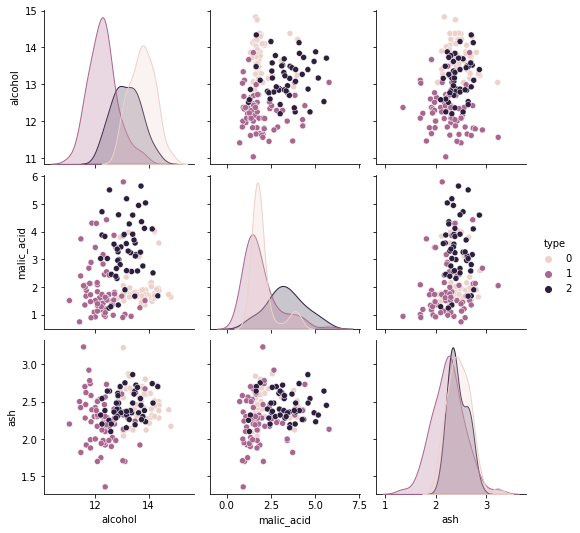

In [89]:
# Plot distribution for first three properties 
import seaborn as sns
sns.pairplot(
    df.iloc[:,:4] , 
    hue = 'type'
    )
plt.savefig('pairplot.jpg')